In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/iris (1).xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


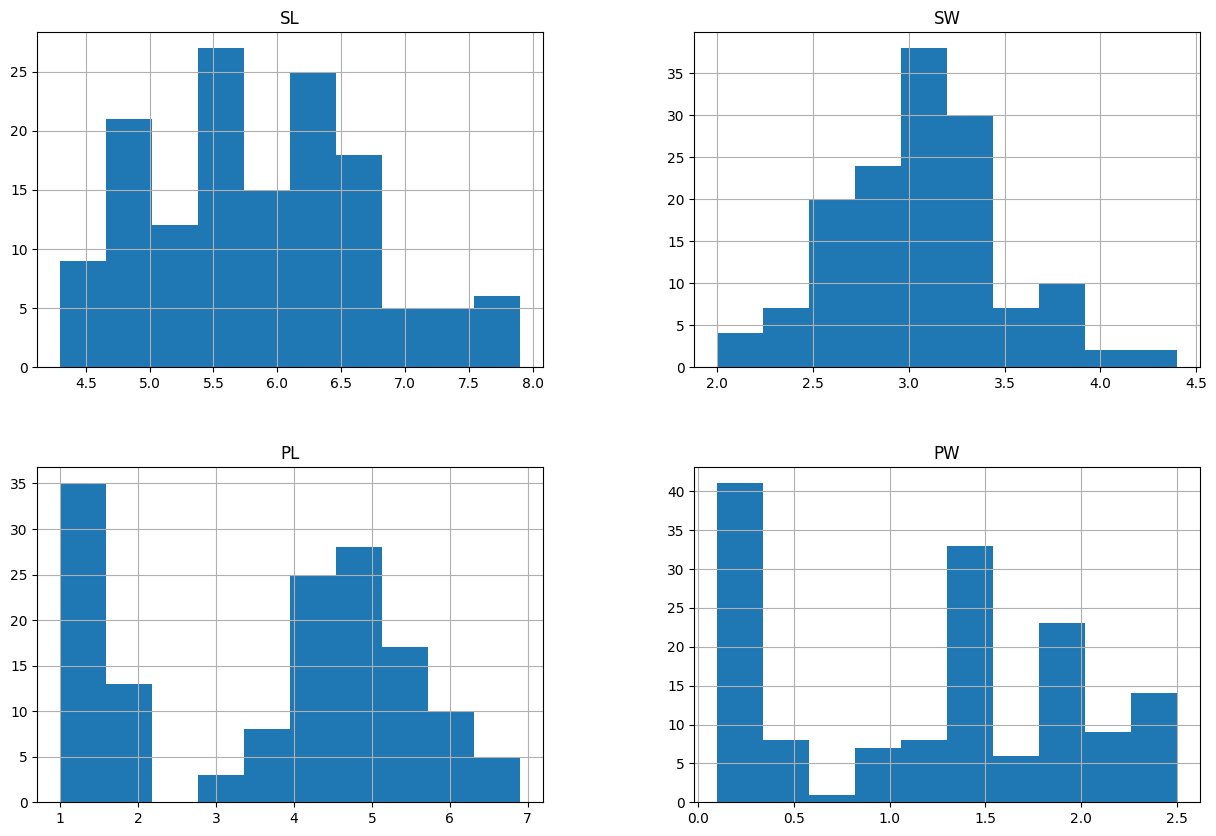

In [ ]:
df.hist(figsize = (15,10))
plt.show()

In [ ]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
df['SL'].fillna(method='ffill', inplace = True)
df['SW'].fillna(method='ffill', inplace = True)
df['PL'].fillna(method='ffill',inplace = True)

In [ ]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

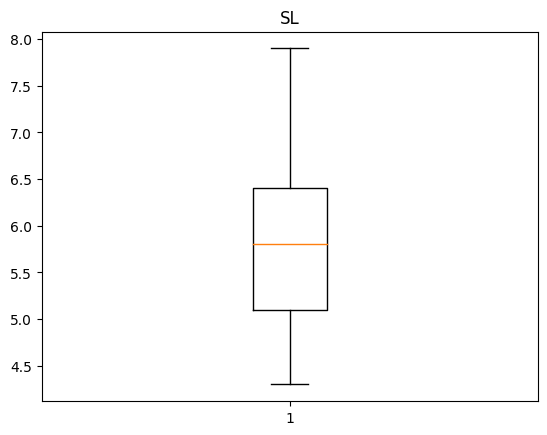

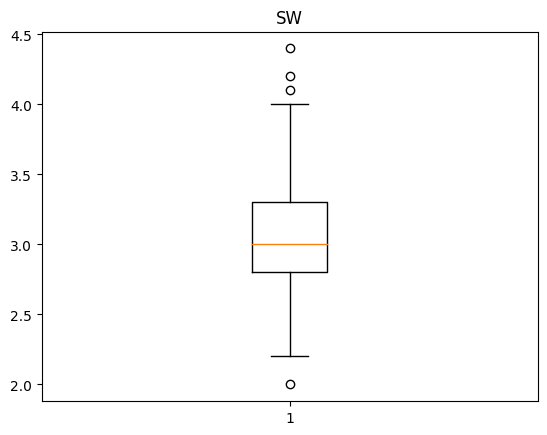

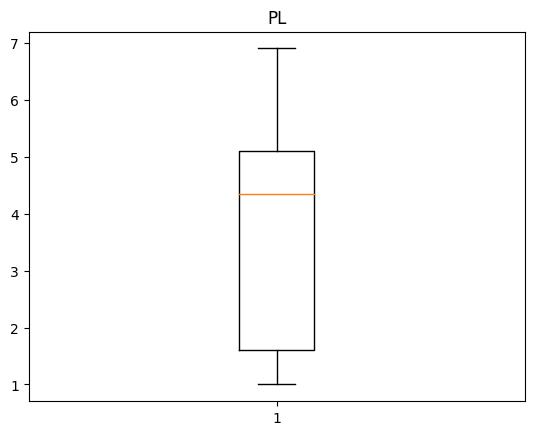

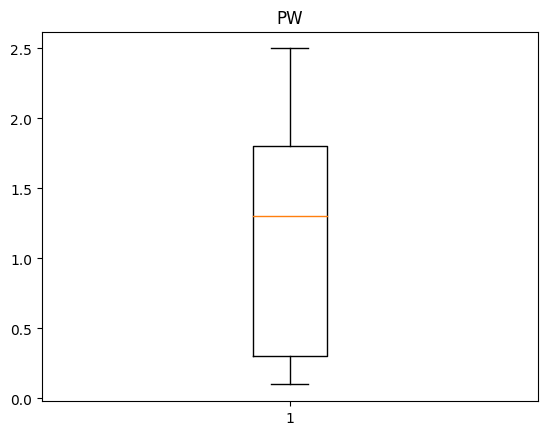

In [ ]:
num_columns = ['SL','SW','PL','PW']
for i in num_columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [ ]:
Q1 = np.percentile(df['SW'],25, method="midpoint")
Q2 = np.percentile(df['SW'],50, method="midpoint")
Q3 = np.percentile(df['SW'],75, method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

q1 is 2.8
q2 is 3.0
q3 is 3.3
min is 2.05
max is 4.05


In [ ]:
outlier = []
for x in df['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [ ]:
ind_SW = df["SW"]>up_lim
ind_SW = df.loc[ind_SW].index
ind_SW

Int64Index([15, 32, 33], dtype='int64')

In [ ]:
df.drop(ind_SW, inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['Classification'] = le.fit_transform(df['Classification'])

In [ ]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.0,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
y = df['Classification']
x = df.drop(['Classification'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
model = lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
confusion_matrix(y_test,y_predictions)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [ ]:
y_predictions

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_predictions))

Accuracy = 0.9666666666666667


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k = []
neighbors = np.arange(3,15)

In [ ]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

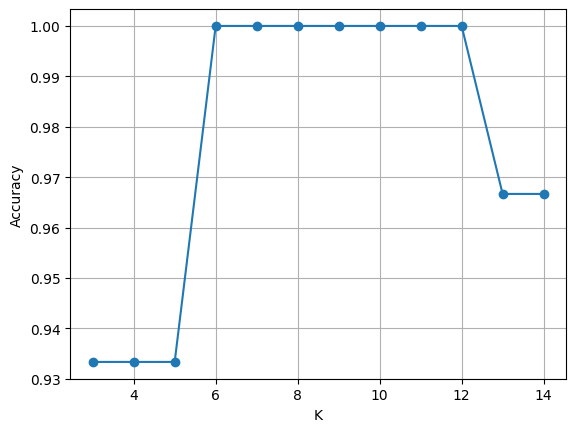

In [ ]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  9]])

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 0.9333333333333333


SVM

In [ ]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred_svm)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [ ]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

In [ ]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_svm1)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(x_train,y_train)
y_pred_dt=model.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.9666666666666667

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9666666666666667

In [ ]:
rf_cls1=RandomForestClassifier(n_estimators=12)
model_rf1=rf_cls1.fit(x_train,y_train)
y_pred_rf1=model_rf1.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf1)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [ ]:
accuracy_score(y_test,y_pred_rf1)

0.9666666666666667